# U.S. Medical Insurance Costs

Welcome to my US Medical Insurance Costs Data Analysis project! I will be analysing data from a csv to better understand the information given. Here are some of my goals:

- Show basic breakdown of data given:
    - Average age
    - Percentage of data that is male vs female
    - Average BMI
    - Number of people w/ children vs. people w/o children & avg number of children
    - % of individuals who are smokers
    - Regional breakdown of respondants
    - Average cost
- Difference between avg costs regionally
- Show the difference between avg cost of non-smoker vs smoker
- Show the difference between avg male and avg female

In this first block, we are going to be cleaning some of the data, because we have some strings, that will not be helpful for analysing data based on sex. We will be giving each sex a numerical value, "female = 0" and "male = 1".

In [1]:
import csv

In [2]:
with open("insurance.csv") as insurance_csv, open("insurance_updated.csv", "w") as insurance_csv_writer:
    reader = csv.reader(insurance_csv)
    writer = csv.writer(insurance_csv_writer)
    for row in reader:
        #print(row[1])
        if row[1] == "female":
            row[1] = 0
        if row[1] == 'male':
            row[1] = 1
        writer.writerow(row)

Great. The data has been cleaned and save to a new csv file that we called "insurance_updated.csv"! Woohoo! Now, let's work on creating a basic breakdown of the given data.

# Basic Breakdown of Given Data

In [3]:
###Average Age
total_age = 0
number_of_people = 0

def age_average():
    avg = total_age/number_of_people
    print("The average age of the person included in our data is " + str(avg) + ' years old.')

with open("insurance_updated.csv") as insurance_csv:
    reader = csv.DictReader(insurance_csv)
    for row in reader:
        #print(row)
        total_age += int(row['age'])
        number_of_people += 1

#age_average()

In [4]:
###Percentage of data that is male vs female
male = 0
female = 0

def percent_male():
    percent = (male/(male + female))*100
    print('Of the individuals in our data, ' + str(percent) + '% are male.')
def percent_female():
    percent = (female/(male + female))*100
    print('Of the individuals in our data, ' + str(percent) + '% are female.')

with open("insurance_updated.csv") as insurance_csv:
    reader = csv.DictReader(insurance_csv)
    for row in reader:
        if int(row['sex']) == 1:
            male += 1
        elif int(row['sex']) == 0:
            female += 1

#print(male, female)
#percent_male()
#percent_female()

In [5]:
###Average BMI
total_bmi = 0
total_people = 0
average_bmi = 0

def avg_bmi():
    average_bmi = total_bmi/total_people
    print('The average BMI is ' + str(average_bmi) +".")
    
with open("insurance_updated.csv") as insurance_csv:
    reader = csv.DictReader(insurance_csv)
    for row in reader:
        total_bmi += float(row['bmi'])
        total_people += 1
        
#avg_bmi()

In [6]:
###Number of people w/ children vs. people w/o children & avg number of children
total_people = 0
people_w_children = 0
people_wo_children = 0
children_in_families = 0
avg_num_of_children_in_familiess = 0

with open("insurance_updated.csv") as insurance_csv:
    reader = csv.DictReader(insurance_csv)
    for row in reader:
        total_people += 1
        if int(row['children']) > 0:
            people_w_children += 1
            children_in_families += int(row['children'])
        if int(row['children']) == 0:
            people_wo_children += 1

def avg_num_of_children_in_families():
    return children_in_families/people_w_children
def family_statistics():
    print('The total number of individuals who have children is ' + str(people_w_children) +".")
    print('The total number of individuals who don\'t have children is ' + str(people_wo_children) +".")
    print('The average number of chilren in a family is ' + str(avg_num_of_children_in_familiess) +".")
    
avg_num_of_children_in_familiess = avg_num_of_children_in_families()
#family_statistics()

In [7]:
###% of individuals who are smokers
total_people = 0
smokers = 0
percent_smokers = 0

with open("insurance_updated.csv") as insurance_csv:
    reader = csv.DictReader(insurance_csv)
    for row in reader:
        total_people += 1
        if row['smoker'] == 'yes':
            smokers += 1

percent_smokers = smokers/total_people*100

def smoker_statistics():
    print('Out of the '+ str(total_people) + ' in our data, ' + str(smokers) + ' or ' + str(percent_smokers) + '% of people are smokers.')

#smoker_statistics()

In [8]:
###Average Insurance Cost
total_people = 0
total_cost = 0
average_cost = 0

with open("insurance_updated.csv") as insurance_csv:
    reader = csv.DictReader(insurance_csv)
    for row in reader:
        total_people += 1
        total_cost += float(row['charges'])

average_cost = total_cost/total_people
def average_cost_stats():
    print('The averarge cost per insured individual per year is $' + str(average_cost) + ' .')

In [9]:
age_average()
percent_male()
percent_female()
avg_bmi()
family_statistics()
smoker_statistics()
average_cost_stats()

The average age of the person included in our data is 39.20702541106129 years old.
Of the individuals in our data, 50.52316890881914% are male.
Of the individuals in our data, 49.47683109118087% are female.
The average BMI is 30.663396860986538.
The total number of individuals who have children is 764.
The total number of individuals who don't have children is 574.
The average number of chilren in a family is 1.9175392670157068.
Out of the 1338 in our data, 274 or 20.47832585949178% of people are smokers.
The averarge cost per insured individual per year is $13270.422265141257 .


# Difference Between Average Costs (Regionally)

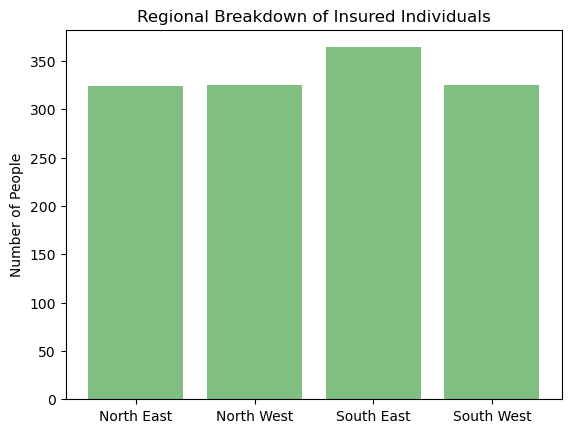

In [10]:
###Regional breakdown of respondants
total_northeast = 0
total_northwest = 0
total_southeast = 0 
total_southwest = 0

with open("insurance_updated.csv") as insurance_csv:
    reader = csv.DictReader(insurance_csv)
    for row in reader:
        if row['region'] == 'northeast':
            total_northeast += 1
        if row['region'] == 'northwest':
            total_northwest += 1
        if row['region'] == 'southeast':
            total_southeast += 1
        if row['region'] == 'southwest':
            total_southwest += 1

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('North East', 'North West', 'South East', 'South West')
y_pos = np.arange(len(objects))
color = 'g'
performance = [total_northeast, total_northwest, total_southeast, total_southwest]

plt.bar(y_pos, performance, align='center', alpha=0.5, color = 'g')
plt.xticks(y_pos, objects)
plt.ylabel('Number of People')
plt.title('Regional Breakdown of Insured Individuals')

plt.show()

# Regional Breakdown of Insurance Cost

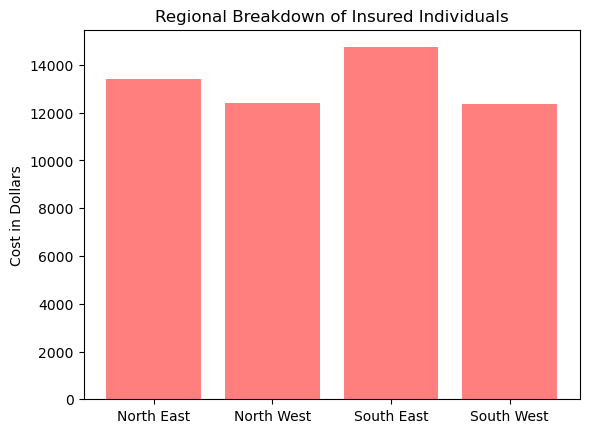

The average cost for insurance in the North East USA is $13406.3845163858.
The average cost for insurance in the North West USA is $12417.575373969228.
The average cost for insurance in the South East USA is $14735.411437609895.
The average cost for insurance in the South East USA is $14735.411437609895.


In [11]:
###Difference between avg costs regionally

def regional_cost(region):
    total_people = 0
    total_cost = 0
    average_cost = 0

    with open("insurance_updated.csv") as insurance_csv:
        reader = csv.DictReader(insurance_csv)
        for row in reader:
            if row['region'] == region:
                total_people += 1
                total_cost += float(row['charges'])

    average_cost = total_cost/total_people
    return average_cost

def regional_cost_stats():
    print("The average cost for insurance in the North East USA is $" + str(regional_cost('northeast')) + ".")
    print("The average cost for insurance in the North West USA is $" + str(regional_cost('northwest')) + ".")
    print("The average cost for insurance in the South East USA is $" + str(regional_cost('southeast')) + ".")
    print("The average cost for insurance in the South East USA is $" + str(regional_cost('southeast')) + ".")



import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('North East', 'North West', 'South East', 'South West')
y_pos = np.arange(len(objects))
performance = [regional_cost('northeast'), regional_cost('northwest'), regional_cost('southeast'), regional_cost('southwest')]

plt.bar(y_pos, performance, align='center', alpha=0.5, color = 'r')
plt.xticks(y_pos, objects)
plt.ylabel('Cost in Dollars')
plt.title('Regional Breakdown of Insured Individuals')


plt.show()
regional_cost_stats()

# Additional Analysis

In [12]:
###Show the difference between avg cost of non-smoker vs smoker

total_smokers = 0
total_non_smokers = 0
total_cost_smokers = 0
total_cost_non_smokers = 0

with open('insurance_updated.csv') as insurance_csv:
    reader = csv.DictReader(insurance_csv)
    for row in reader:
        if row['smoker'] == 'yes':
            total_smokers += 1
            total_cost_smokers += float(row['charges'])
        if row['smoker'] == 'no':
            total_non_smokers += 1
            total_cost_non_smokers += float(row['charges'])

avg_cost_smoker = total_cost_smokers/total_smokers
avg_cost_non_smoker = total_cost_non_smokers/total_non_smokers
cost_diff = avg_cost_smoker - avg_cost_non_smoker

#print(total_smokers, total_non_smokers, total_cost_smokers, total_cost_non_smokers, avg_cost_smoker, avg_cost_non_smoker)
def avg_smoker_price_difference():
    print("The difference between the average smoker and non-smoker is $" + str(cost_diff) +'.')

avg_smoker_price_difference()

The difference between the average smoker and non-smoker is $23615.96353367665.


In [13]:
###Show the difference between avg male and avg female

total_male = 0
total_female = 0
total_cost_male = 0
total_cost_female = 0

with open('insurance_updated.csv') as insurance_csv:
    reader = csv.DictReader(insurance_csv)
    for row in reader:
        if row['sex'] == '0':
            total_female += 1
            total_cost_female += float(row['charges'])
        if row['sex'] == '1':
            total_male += 1
            total_cost_male += float(row['charges'])

avg_cost_male = total_cost_male/total_male
avg_cost_female = total_cost_female/total_female
cost_diff_male_female = avg_cost_male - avg_cost_female

#print(total_smokers, total_non_smokers, total_cost_smokers, total_cost_non_smokers, avg_cost_smoker, avg_cost_non_smoker)
def avg_sex_difference():
    print("The difference between the average male and female is $" + str(cost_diff_male_female) +'.')

avg_sex_difference()

The difference between the average male and female is $1387.1723338865468.
